<a href="https://colab.research.google.com/github/ByeonJuHwan/PythonStudy/blob/main/py24_yob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 미국 신생아 이름 데이터 셋



*   https://github.com/wesm/pydata-book
*   1880 ~ 2010년 연도별로 파일이 나눠져 있음.
* 각 파일에는 '이름,성별,신생아수'가 comma(,)로 구분되어 있음.



In [37]:
file_path='https://github.com/wesm/pydata-book/raw/3rd-edition/datasets/babynames/yob1880.txt'

In [38]:
yob1880 = pd.read_csv(file_path)

In [39]:
yob1880.head()

,Mary,F,7065
0,Anna,F,2604
1,Emma,F,2003
2,Elizabeth,F,1939
3,Minnie,F,1746
4,Margaret,F,1578


`pd.read_csv()` 함수는 파일의 첫번째 줄을 데이터프레임의 컬럼 이름으로 취급함(기본값).

csv 파일에 컬럼 이름이 포함되어 있지 않은 경우 (파일의 첫번째 줄 부터 데이터가 시작되는 경우) 에는 컬럼 이름들을 함수의 argument로 전달해야함.

In [40]:
yob1880 = pd.read_csv(file_path,names=['name','gender','births'])

In [41]:
yob1880.head()

,name,gender,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


각 TXT 파일을 읽어서 만들어진 연도별 데이테프레임들을 저장하는 리스트를 만드세요.

* 빈 리스트 변수 선언
* 1880~2010 반복
* 각 연도에서 데이터프레임 생성
    * 각각의 데이터프레임에는 'year' 컬럼을 추가

In [42]:
col_names = ['name','gender','births','year']
yobs=[] # 데이터프레임들을 저장할 리스트.
for year in range(1880,2011):
    file_path = f'https://github.com/wesm/pydata-book/raw/3rd-edition/datasets/babynames/yob{year}.txt'
    # 파일 읽어서 데이터프레임 생성
    df = pd.read_csv(file_path,names=col_names)
    # 데이터프레임에 year 컬럼을 추가 -파생변수추가
    df['year'] = year
    #데이터프레임을 리스트에 추가
    yobs.append(df)

In [43]:
len(yobs)

131

In [44]:
yobs[0].head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


리스트에 있는 131개의 데이터프레임을 하나의 데이터 프레임으로 합침.

In [45]:
df = pd.concat(yobs,ignore_index=True)
# param ignore_index : 데이터프레임을 합칠때 인덱스를 무시할 지 말 지를 설정.기본값 False

In [46]:
df.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [47]:
df.tail()

,name,gender,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   gender  1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [49]:
df.loc[0] # (비교, 주의) iloc[0] 다른결과

name      Mary
gender       F
births    7065
year      1880
Name: 0, dtype: object

In [50]:
df.iloc[0]

name      Mary
gender       F
births    7065
year      1880
Name: 0, dtype: object

## 연도별 신생아 수, 시각화

In [65]:
births_by_year = df.groupby('year').births.sum()
births_by_year

year
1880     201486
1881     192703
1882     221538
1883     216954
1884     243466
         ...   
2006    3946702
2007    3986130
2008    3915955
2009    3801002
2010    3657392
Name: births, Length: 131, dtype: int64

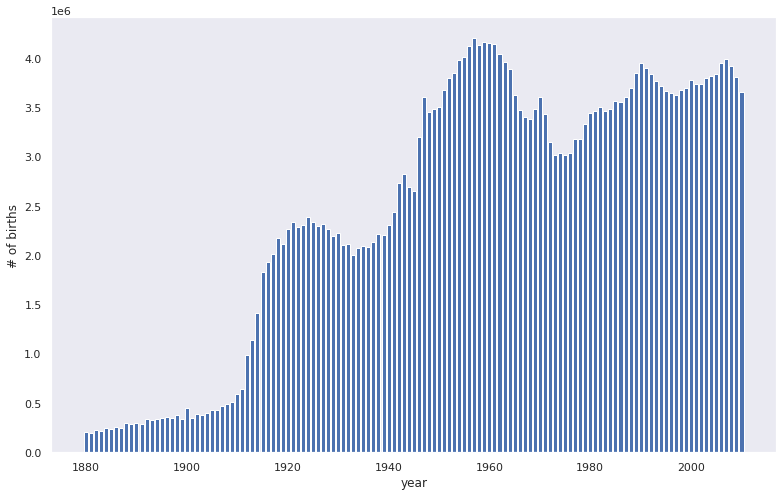

In [68]:
plt.bar(x=births_by_year.index,height=births_by_year.values)
plt.grid()
plt.xlabel('year')
plt.ylabel('# of births')
plt.show()

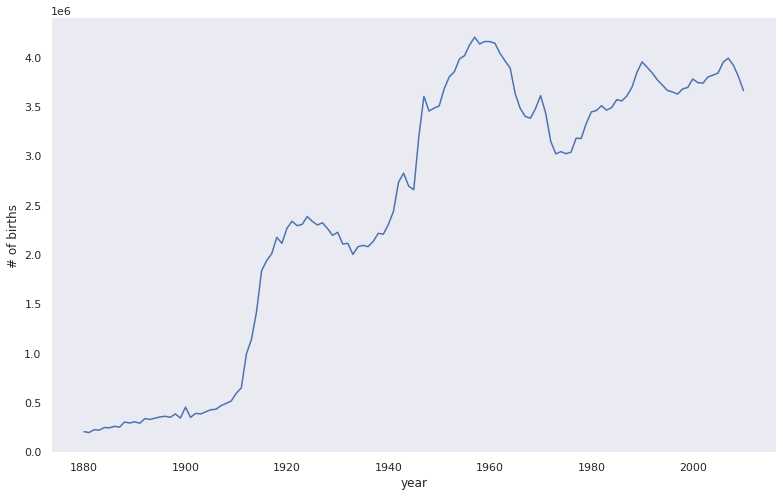

In [72]:
plt.plot(births_by_year.index, births_by_year.values)
plt.grid()
plt.xlabel('year')
plt.ylabel('# of births')
plt.show()

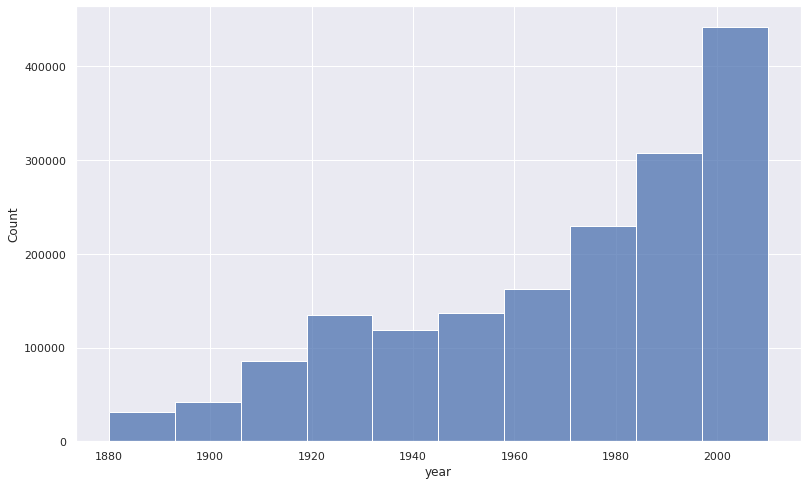

In [79]:
sns.histplot(data=df, x='year',bins=10)
plt.show()

## 연도별 성별 신생아 수, 시각화

In [83]:
births_by_year_gender = df.groupby(['year','gender']).births.sum()
births_by_year_gender # multi_level 인덱스를 갖는 series

year  gender
1880  F           90993
      M          110493
1881  F           91955
      M          100748
1882  F          107851
                 ...   
2008  M         2032310
2009  F         1827643
      M         1973359
2010  F         1759010
      M         1898382
Name: births, Length: 262, dtype: int64

In [91]:
# multi_level 인덱스를 데이터프레임의 컬럼으로 변환
births_df = births_by_year_gender.reset_index()
births_df

,year,gender,births
0,1880,F,90993
1,1880,M,110493
2,1881,F,91955
3,1881,M,100748
4,1882,F,107851
...,...,...,...
257,2008,M,2032310
258,2009,F,1827643
259,2009,M,1973359
260,2010,F,1759010


In [92]:
births_female = births_df[births_df.gender=='F']
births_male = births_df[births_df.gender=='M']

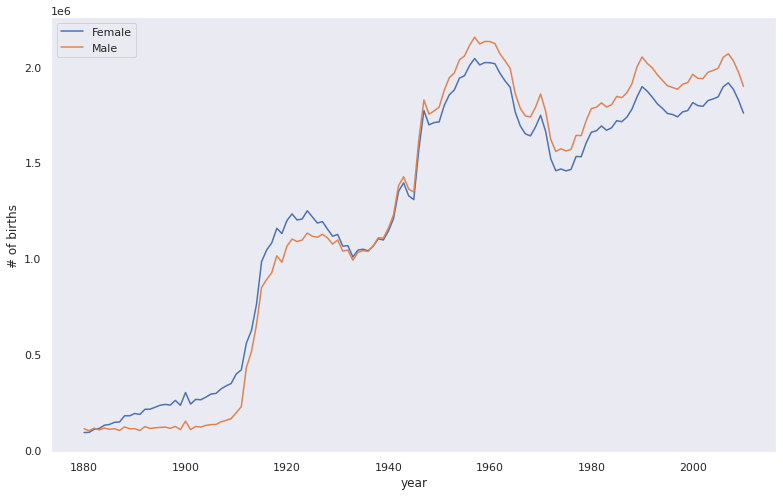

In [94]:
plt.plot(births_female.year,births_female.births,label='Female')
plt.plot(births_male.year,births_male.births,label='Male')
plt.grid()
plt.xlabel('year')
plt.ylabel('# of births')
plt.legend()
plt.show()